# Bubble Charts: An in-class challenge

A bubble chart is a scatterplot where the size of the bubble is scaled by some value. Bubble charts were made small f famous by the late [Hans Rosling in one of the most watched Ted talks ever](https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen).

Your challenge in class today: Make a bubble chart out of the dataset of majors by race and sex. I'm interested in gender differences by majors. 

I'll help you set up the data.

In [1]:
library(dplyr)
library(ggplot2)
library(reshape2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
enrollment <- read.csv("../../Data/collegeenrollment.csv")

In [3]:
head(enrollment)

College,Degree,MajorCode,MajorName,RaceGender,Race,Gender,Count,Total
College of Agri Sci and Natl Resources,B1BC,BIOC,Biochemistry,NonResidentAlienMale,NonResidentAlien,Male,3,97
College of Agri Sci and Natl Resources,B1AS,ASCI,Animal Science,NonResidentAlienMale,NonResidentAlien,Male,0,338
College of Agri Sci and Natl Resources,B1FW,FWL,Fisheries and Wildlife,NonResidentAlienMale,NonResidentAlien,Male,0,191
College of Agri Sci and Natl Resources,B1AP,APSC,Applied Science,NonResidentAlienMale,NonResidentAlien,Male,1,71
College of Agri Sci and Natl Resources,B1HO,HORT,Horticulture,NonResidentAlienMale,NonResidentAlien,Male,1,52
College of Agri Sci and Natl Resources,B1ED,AEDU,Agricultural Education,NonResidentAlienMale,NonResidentAlien,Male,0,103


Note we have data that is long -- data by race and gender. We just want it by gender. So we need to do some grouping together and later we need to make this wider. So we have to first group by College, Major and Gender and add them up. 

In [4]:
majors <- enrollment %>% 
    group_by(College, MajorName, Gender) %>%
    summarize(
       Total=sum(Count)
    )

Now we need to make that long data wide, so Male and Female are on the same line.

In [5]:
majors_bubble <- dcast(majors, College + MajorName ~ Gender)

Using Total as value column: use value.var to override.


In [6]:
head(majors_bubble)

College,MajorName,Female,Male
College of Agri Sci and Natl Resources,Agribusiness,66,175
College of Agri Sci and Natl Resources,Agricultural & Env Sci Comm,27,5
College of Agri Sci and Natl Resources,Agricultural Economics,23,109
College of Agri Sci and Natl Resources,Agricultural Education,80,23
College of Agri Sci and Natl Resources,Agricultural Journalism,2,0
College of Agri Sci and Natl Resources,Agronomy,24,167


We now have enough to do a scatterplot, but what are we lacking for a bubble chart? Some kind of weighting. So let's create a couple. 

In [7]:
bubble <- majors_bubble %>% 
    mutate(
       Total = Male+Female,
       Difference = abs(Male-Female)
    )

The `abs()` bits there mean give me the absolute value -- so everything is above zero, regardless of which is larger. 

So let's try a plot:

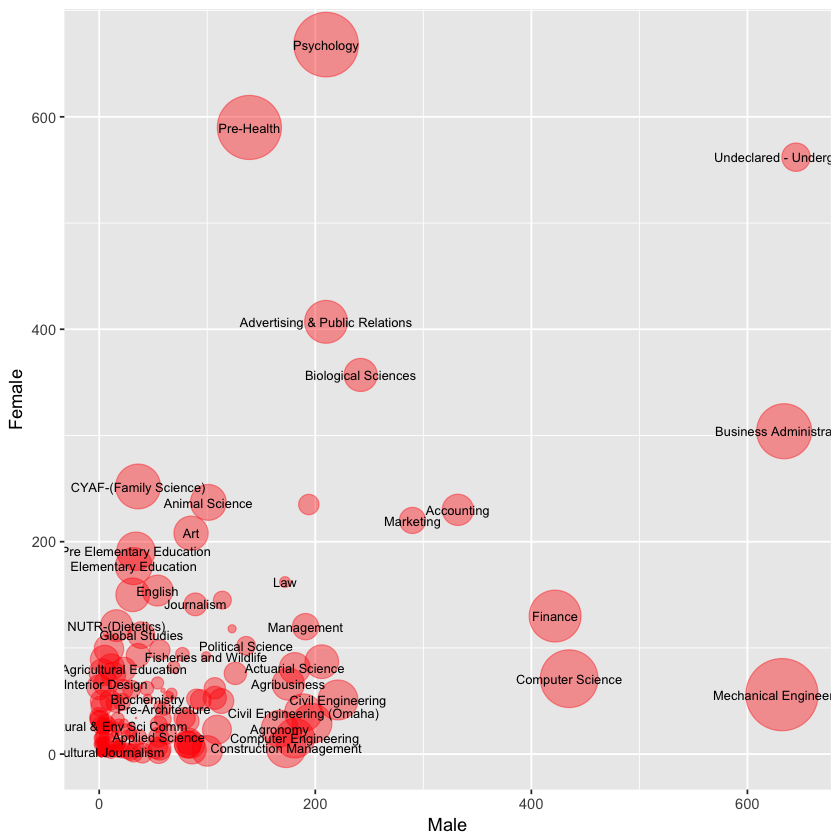

In [24]:
ggplot(bubble, aes(x = Male, y = Female, size=Difference)) +
geom_point(alpha=0.4, color='red') +
scale_size_continuous(range=c(.1, 20)) +
scale_colour_continuous(guide = FALSE) +
geom_text(data=bubble, aes(label=MajorName, size=10), check_overlap=TRUE) +
theme(legend.position="none")

Your challenge: Make this better. [Here's some guidance on things you can change](https://www.r-graph-gallery.com/320-the-basis-of-bubble-plot/). [Here's more](http://t-redactyl.io/blog/2016/02/creating-plots-in-r-using-ggplot2-part-6-weighted-scatterplots.html). We'll talk at the end of class.  